# PLOTTING AND VISUALIZATION

In [2]:
# Matplotlib is a Python Libraray for publication-quality 2D and 3D graphics. with support for a variety of different output formats.

In [4]:
# www.matplotlib.org

In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# configures the matplotlib to use the inline backend, which results in the created figures being displayed directly in, for example the jupyter noteebook , rather than in n new window
import matplotlib as mpl # module
import matplotlib.pyplot as plt # accessing module for convinient access to the submodule matplotlib, pyplot that provides functions that we will use to create a new figures instances
from mpl_toolkits.mplot3d import Axes3D # Imports Axes3D for 3D plotting (from the correct module path).

In [45]:
import numpy as np
import sympy

##### f(x) = x^3 +5x^2+10 where x belongs to [-5,2]

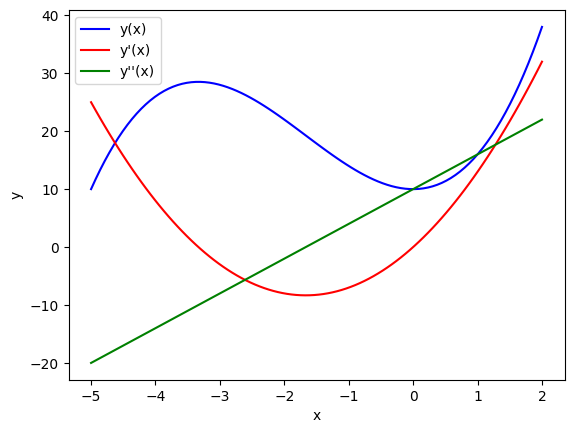

In [11]:
x = np.linspace(-5,2,100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

fig,ax = plt.subplots()
ax.plot(x,y1,color = "blue",label = "y(x)")
ax.plot(x,y2,color = "red",label = "y'(x)")
ax.plot(x,y3,color = "green",label = "y''(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

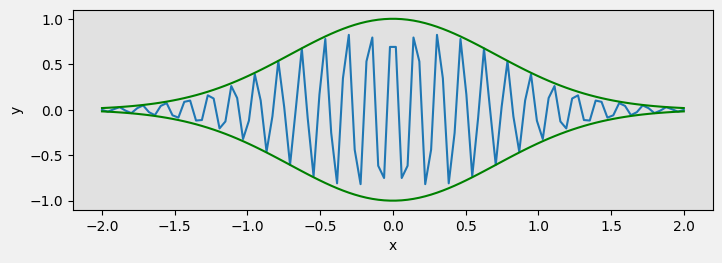

In [13]:
fig = plt.figure(figsize=(8,2.5), facecolor="#f1f1f1")
# axes coordinates as fractions of the canvas widtth & height
left,bottom,width,height = 0.1,0.1,0.8,0.8
ax = fig.add_axes((left,bottom,width,height),facecolor = "#e1e1e1")
x = np.linspace(-2,2,100)
y1 = np.cos(40*x)
y2 = np.exp(-x**2)

ax.plot(x,y1*y2)
ax.plot(x,y2,'g')
ax.plot(x,-y2,'g')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.savefig("graph.png",dpi=100, facecolor="#f1f1f1")

In [15]:
# Types of 2D graph plotting:
# 1. Axes.plot
# 2. Axes.step
# 3. Axes.bar
# 4. Axes.hist
# 5. Axes.errorbar
# 6. Axes.scatter
# 7. Axes.fill_between
# 8. Axes.quiver

#### Line Properties

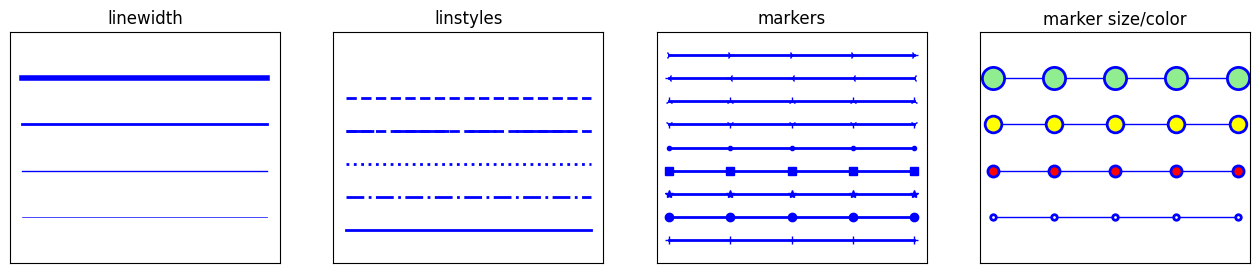

In [18]:
x = np.linspace(-5,5,5)
y = np.ones_like(x)
def axes_settings(fig,ax,title,ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0,ymax+1)
    ax.set_title(title)

fig,axes = plt.subplots(1,4,figsize=(16,3))

# Line width
linewidths = [0.5,1.0,2.0,4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x,y+n,color="blue",linewidth=linewidth)

axes_settings(fig,axes[0],"linewidth",len(linewidths))

# Line style
linestyles = ['-','-.',':','--','--']
for n,linestyle in enumerate(linestyles):
    axes[1].plot(x,y+n,color="blue",lw = 2,ls = linestyle)

# custom dash style
line, = axes[1].plot(x,y+3,color = "blue",lw=2)
length1,gap1,length2,gap2 = 10,7,20,7
line.set_dashes([length1,gap1,length2,gap2])
axes_settings(fig,axes[1],"linstyles",len(linestyles) + 1)

# marker types
markers = ['+','o','*','s','.','1','2','3','4']
for n, marker in enumerate(markers):
    # lw = linewidth; ls = linestyle
    axes[2].plot(x,y+n,color="blue",lw=2,ls='-',marker=marker)
axes_settings(fig,axes[2],"markers",len(markers))

# marker sizeaand color
markersizecolors = [(4,"white"),(8,"red"),(12,"yellow"),(16,"lightgreen")]
for n , (markersize,markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x,y+n,color="blue",lw=1,ls="-",marker="o",markersize=markersize, markerfacecolor=markerfacecolor,markeredgewidth=2)
axes_settings(fig,axes[3],"marker size/color", len(markersizecolors))

##### Symbolic variable for x and a numerical array with specific values of x

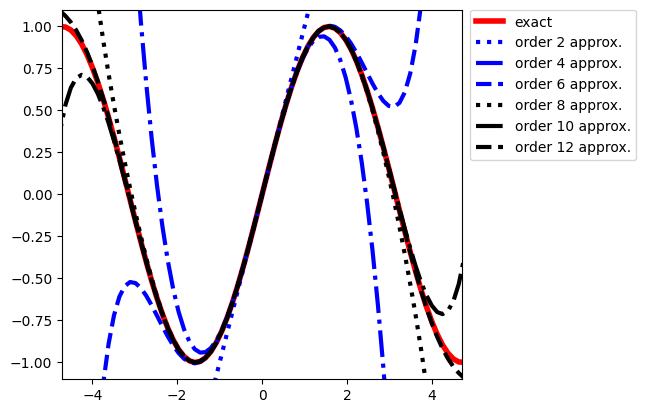

In [63]:
sym_x = sympy.Symbol('x')
x = np.linspace(-2*np.pi,2*np.pi,100)

def sin_expansion(x,n):
    """
    Evaluate the nth order Taylor series expression of sin(x) for the numerical values in the array x
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots()

ax.plot(x,np.sin(x),linewidth=4,color="red",label='exact')
colours = ["blue","black"]
linestyles = [":","-.","--"]
for idx,n in enumerate(range(1,12,2)):
    ax.plot(x,sin_expansion(x,n),color=colours[idx//3],linestyle=linestyles[idx%3],linewidth=3,label="order %d approx."%(n+1))

ax.set_ylim(-1.1,1.1)
ax.set_xlim(-1.5*np.pi,1.5*np.pi)


# place a legend outsize of the Axes
ax.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.0)
# make room for the legend to the right of the Axes
fig.subplots_adjust(right=0.75)